In [22]:
import cv2
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime
import os
import glob

In [16]:
folderPath = r"/home/transferlearningtoolkit/tlt-experiments/Data/training"

In [13]:
folder = os.listdir(r"/home/transferlearningtoolkit/tlt-experiments/Data/training") # returns list

In [29]:
images = os.path.join(folderPath, "image_2")
labels = os.path.join(folderPath, "label_2")

In [37]:
imagess =  os.listdir(images)

In [36]:
for image in imagess:
    if image[:-4]+".txt" not in labels:
        print(image[:-4])
        continue
    imageName = os.path.join(images,image)
    labelFile = os.path.join(images,image[:-4]+".txt")
    imageToPredict = cv2.imread(imageName)
    print(imageToPredict.shape)
    x_ = imageToPredict.shape[1]
    y_ = imageToPredict.shape[0]
    with open(labelFile, 'r') as reader:
     # Read and print the entire file line by line
        line = reader.readline()
        while line != '':  # The EOF char is an empty string
            print(line, end='')
            lists=line.split( )
            print(lists[4:8])
            print("\n")
            line = reader.readline()

In [52]:
with open('/home/transferlearningtoolkit/tlt-experiments/Data/training/label_2/final_mp4_2775.txt', 'r') as reader:
     # Read and print the entire file line by line
    line = reader.readline()
    while line != '':  # The EOF char is an empty string
        print(line, end='')
        lists=line.split( )
        print(lists[4:8])
        print("\n")
        line = reader.readline()

person 0.00 0 0.0 457.00 294.00 650.00 642.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0
['457.00', '294.00', '650.00', '642.00']


person 0.00 0 0.0 136.00 114.00 258.00 256.00 0.0 0.0 0.0 0.0 0.0 0.0 0.0['136.00', '114.00', '258.00', '256.00']




In [2]:
# /home/transferlearningtoolkit/tlt-experiments/Data/training
# mywidth = 320
# myheight=240
# img = Image.open(r'/home/facit/Desktop/DeepStream/KittiConversion/training/image_2/final_mp4_4.jpg')
# wpercent = (mywidth / float(img.size[0]))
# hpercent = (myheight / float(img.size[1]))
# hsize = int((float(img.size[1])*float(hpercent)))
# img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
# open_cv_image = np.array(img)
# # Convert RGB to BGR
# open_cv_image = open_cv_image[:, :, ::-1].copy()

In [3]:
# plt.imshow(open_cv_image)

In [4]:
# (origLeft, origTop, origRight, origBottom) = (160, 35, 555, 470)
# drawBox([[1, 0, origLeft, origTop, origRight, origRight]],open_cv_image)
# img.save('resized.jpg')

In [5]:
# open_cv_image

In [36]:
def drawBox(boxes, image):
    for i in range(0, len(boxes)):
        # changed color and width to make it visible
        cv2.rectangle(image, (boxes[i][2], boxes[i][3]), (boxes[i][4], boxes[i][5]), (255, 0, 0), 1)
    plt.imshow(image)
    cv2.imshow("img", image)
    now = datetime.now()
    current_time = now.strftime("%Ho%Mo%S")
    print("Current Time =", current_time+".jpg")
    w = current_time+".jpg"
    cv2.imwrite(w,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [37]:
imageToPredict = cv2.imread(r"/home/facit/Desktop/COCO_val2014_000000001000.jpg", 3)
print(imageToPredict.shape)

(480, 640, 3)


In [44]:
def cvTest():
    # imageToPredict = cv2.imread("img.jpg", 3)
    imageToPredict = cv2.imread(r"/home/facit/Desktop/COCO_val2014_000000001000.jpg", 3)
    print(imageToPredict.shape)
    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]
    (origLeft, origTop, origRight, origBottom) = (115,152,198, 380)
    drawBox([[1, 0, origLeft, origTop, origRight, origBottom]],imageToPredict)
    
    
    targetSize1 = 320
    targetSize2 = 240
    x_scale = targetSize1 / x_
    y_scale = targetSize2 / y_
    print(x_scale, y_scale)
    
    img = cv2.resize(imageToPredict, (targetSize1, targetSize2));
    print(img.shape)
    
    img = np.array(img);
    # original frame as named values
    x = int(np.round(origLeft * x_scale))
    y = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    # Box.drawBox([[1, 0, x, y, xmax, ymax]], img)
    
    drawBox([[1, 0, x, y, xmax, ymax]], img)

(480, 640, 3)
Current Time = 13o02o12.jpg
0.5 0.5
(240, 320, 3)
Current Time = 13o02o14.jpg


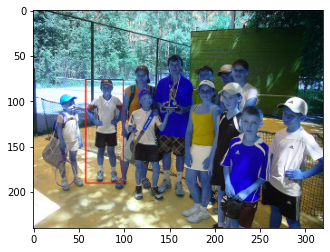

In [45]:
cvTest()

In [9]:
# import cv2
# img= cv2.imread('/home/facit/Desktop/peter-broomfield-m3m-lnR90uM-unsplash.jpg',cv2.IMREAD_UNCHANGED)
# print('Original Dimensions:',img.shape)

In [10]:
# #Downscaling
# scale_percent = 60 # percent of original size 
# width = int(img.shape[1] * scale_percent / 100) 
# height = int(img.shape[0] * scale_percent / 100) 
# dim = (width, height) 
# # resize image in down scale 
# resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized.shape) 
# cv2.imwrite('resize.png', resized)

In [11]:
# #upscaling
# scale_percent = 220 # percent of original size 
# width = int(img.shape[1] * scale_percent / 100) 
# height = int(img.shape[0] * scale_percent / 100) 
# dim = (width, height) 
# # resize image in up scale 
# resized_up = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized_up.shape) 
# cv2.imwrite('1resize.png', resized_up)


In [12]:

# #resize only width
# width = 440 
# height = img.shape[0] # keep original height 
# dim = (width, height) 
# # resize image 
# resized_w = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized_w.shape) 
# cv2.imwrite('2resize.png', resized_w) 


In [13]:

# #resize only height
# width = img.shape[1] # keep original width 
# height = 440 
# dim = (width, height)
#  # resize image 
# resized_h = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized_h.shape) 
# cv2.imwrite('5resize.png', resized_h)


In [14]:
# #resize width and height
# width = 350 
# height = 450 
# dim = (width, height) 
# # resize image 
# resized_hw = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
# print('Resized Dimensions : ',resized_hw.shape) 
# cv2.imwrite('4resize.png', resized_hw) 

# # cv2.waitKey(0)
# # cv2.destroyAllWindows()